In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
!pip install mailbox
!pip install google

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [13]:
import mailbox
mboxfile = "gmail.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [14]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
X-Google-DKIM-Signature
X-Gm-Message-State
X-Received
X-Forwarded-To
X-Forwarded-For
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
DKIM-Signature
Received
From
To
Subject
Date
List-Unsubscribe
List-Unsubscribe-Post
x-CSA-Compliance-Source
MIME-Version
Reply-To
List-ID
X-CSA-Complaints
X-SFMC-Stack
x-job
Message-ID
Feedback-ID
Content-Type


In [17]:
import csv

with open('mailbox.csv', 'w', encoding='utf-8', newline='') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject', 'from', 'date', 'to', 'label', 'thread'])

    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['date'], message['to'], message['X-Gmail-Labels'], message['X-GM-THRID']])


In [18]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [19]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [20]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\522019804.py:1: FutureWarning: Parsed string "Sat, 10 Sep 2022 10:48:07 CEST" included an un-recognized timezone "CEST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\522019804.py:1: FutureWarning: Parsed string "Tue, 04 Jan 2022 21:56:48 CET" included an un-recognized timezone "CET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\522019804.py:1: FutureWarning: Parsed string "

In [21]:
dfs = dfs[dfs['date'].notna()]

In [22]:
dfs.to_csv('gmail.csv')

In [23]:
dfs.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5815 entries, 1 to 5816
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  5763 non-null   object             
 1   from     5815 non-null   object             
 2   date     5815 non-null   datetime64[ns, UTC]
 3   to       5813 non-null   object             
 4   label    5815 non-null   object             
 5   thread   5815 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 318.0+ KB


In [24]:
dfs.head(10)

,subject,from,date,to,label,thread
1,Ends Soon: EXTRA 40% off UA.com Outlet,"""Under Armour"" <underarmour@emails.underarmour...",2023-10-05 12:30:09+00:00,<mjm.ahmed@gmail.com>,"Spam,Category Promotions,Unread",1778918641279235859
2,New: Find AllTrails on WearOS by Google!,AllTrails <no-reply@email.alltrails.com>,2023-10-04 18:34:00+00:00,mj.ahmad258@gmail.com,"Inbox,Category Promotions,Unread",1778850928098292874
3,Ready to advance your data science career?,"""Coursera"" <no-reply@m.mail.coursera.org>",2023-10-06 16:56:54+00:00,mj.ahmad258@gmail.com,"Inbox,Opened,Category Updates",1779026011234093091
4,=?utf-8?Q?A_Ring_of_Fire:_This_Weekend=E2=80=9...,NASA <hq-newsletter@nasa.gov>,2023-10-13 22:47:17+00:00,mjm.ahmed@gmail.com,"Inbox,Category Updates,Unread",1779682236385467810
5,Get an EXTRA 50% off UA.com Outlet,"""Under Armour"" <underarmour@emails.underarmour...",2023-10-10 12:20:05+00:00,<mjm.ahmed@gmail.com>,"Spam,Category Promotions,Unread",1779371098742365778
6,=?utf-8?q?Was_Lucille_Ball_really_rude=3F?=,Quora Digest <english-personalized-digest@quor...,2023-10-11 12:16:31+00:00,mjm.ahmed@gmail.com,"Spam,Category Updates,Unread",1779461445349641905
7,Recommended: Excel Essentials and Beyond,"""Coursera"" <Coursera@email.coursera.org>",2023-10-09 18:04:33+00:00,<mj.ahmad258@gmail.com>,"Inbox,Category Promotions,Unread",1779302059900692515
8,[rail-trail eNews] Winning cover photo; Midwes...,"""Rails-to-Trails Conservancy"" <info@railstotra...",2023-10-10 21:16:22+00:00,"""Mj Ahmad"" <mj.ahmad258@gmail.com>","Inbox,Category Promotions,Unread",1779404766219118242
9,=?UTF-8?B?RW50ZXIgaWYgeW91IGRhcmUsIGFuZCB5b3Ug...,"""PepsiCo Tasty Rewards"" <PepsiCo@em.pepsico.com>",2023-10-13 20:06:34+00:00,<mjm.ahmed@gmail.com>,"Spam,Category Promotions,Unread",1779672548465738721
10,=?utf-8?q?Why_do_cannabis_smokers_get_so_offen...,Quora Digest <english-personalized-digest@quor...,2023-10-13 20:13:16+00:00,mjm.ahmed@gmail.com,"Spam,Category Updates,Unread",1779672550921086331


In [25]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [26]:
import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [27]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [28]:
myemail = 'itsmeskm99@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [29]:
dfs.drop(columns='to', inplace=True)

In [30]:
dfs.head(10)

,subject,from,date,label,thread
1,Ends Soon: EXTRA 40% off UA.com Outlet,underarmour@emails.underarmour.com,2023-10-05 12:30:09+00:00,inbox,1778918641279235859
2,New: Find AllTrails on WearOS by Google!,no-reply@email.alltrails.com,2023-10-04 18:34:00+00:00,inbox,1778850928098292874
3,Ready to advance your data science career?,no-reply@m.mail.coursera.org,2023-10-06 16:56:54+00:00,inbox,1779026011234093091
4,=?utf-8?Q?A_Ring_of_Fire:_This_Weekend=E2=80=9...,hq-newsletter@nasa.gov,2023-10-13 22:47:17+00:00,inbox,1779682236385467810
5,Get an EXTRA 50% off UA.com Outlet,underarmour@emails.underarmour.com,2023-10-10 12:20:05+00:00,inbox,1779371098742365778
6,=?utf-8?q?Was_Lucille_Ball_really_rude=3F?=,english-personalized-digest@quora.com,2023-10-11 12:16:31+00:00,inbox,1779461445349641905
7,Recommended: Excel Essentials and Beyond,Coursera@email.coursera.org,2023-10-09 18:04:33+00:00,inbox,1779302059900692515
8,[rail-trail eNews] Winning cover photo; Midwes...,info@railstotrails.org,2023-10-10 21:16:22+00:00,inbox,1779404766219118242
9,=?UTF-8?B?RW50ZXIgaWYgeW91IGRhcmUsIGFuZCB5b3Ug...,PepsiCo@em.pepsico.com,2023-10-13 20:06:34+00:00,inbox,1779672548465738721
10,=?utf-8?q?Why_do_cannabis_smokers_get_so_offen...,english-personalized-digest@quora.com,2023-10-13 20:13:16+00:00,inbox,1779672550921086331


In [31]:
import datetime 
import pytz

def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [32]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [33]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.weekday_name)
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

AttributeError: 'Timestamp' object has no attribute 'weekday_name'

In [34]:
import pandas as pd

# Assuming you have a DataFrame 'dfs' with a 'date' column
dfs['dayofweek'] = dfs['date'].dt.day_name()
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)


In [35]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [36]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [37]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [38]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [39]:
dfs.index = dfs['date']
del dfs['date']

In [40]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Sun, 22 Aug 2021 10:34 PM
Sun, 15 Oct 2023 02:57 PM
label
inbox    5815
Name: count, dtype: int64


In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [42]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [43]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\2157647245.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\2157647245.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

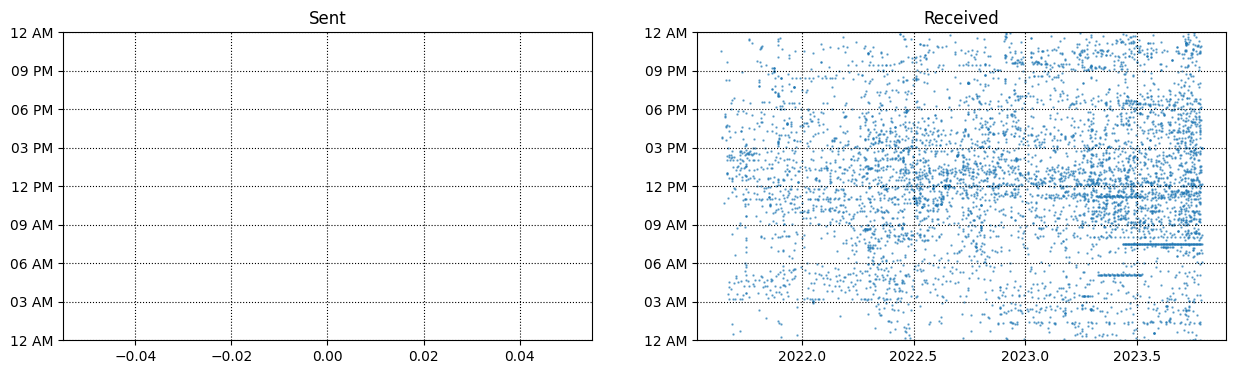

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [45]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [47]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/44.1 MB ? eta -:--:--
                                              0.0/44.1 MB ? eta -:--:--
                                             0.0/44.1 MB 325.1 kB/s eta 0:02:16
                                             0.0/44.1 MB 326.8 kB/s eta 0:02:15
                                             0.1/44.1 MB 525.1 kB/s eta 0:01:24
                                              0.3/44.1 MB 1.2 MB/s eta 0:00:37
                                              0.4/44.1 MB 1.7 MB/s eta 0:00:26
                                              1.0/44.1 MB 3.3 MB/s eta 0:00:14
     -                                        2.2/44.1 MB 6.3 MB/s eta 0:00:07
     ---                                      3.3/44.1 MB 8.4 MB/s eta 0:00:05
     ----                                     4.7/44.1 MB 10.7 MB/s eta 0:00:04
     -----                                    6.2/44.1 MB 12.9 

In [48]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [49]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\2157647245.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\1007625563.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
C:\Users\CYBR520\AppData\Local\Temp\ipykernel_15120\2157647245.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


ValueError: zero-size array to reduction operation maximum which has no identity

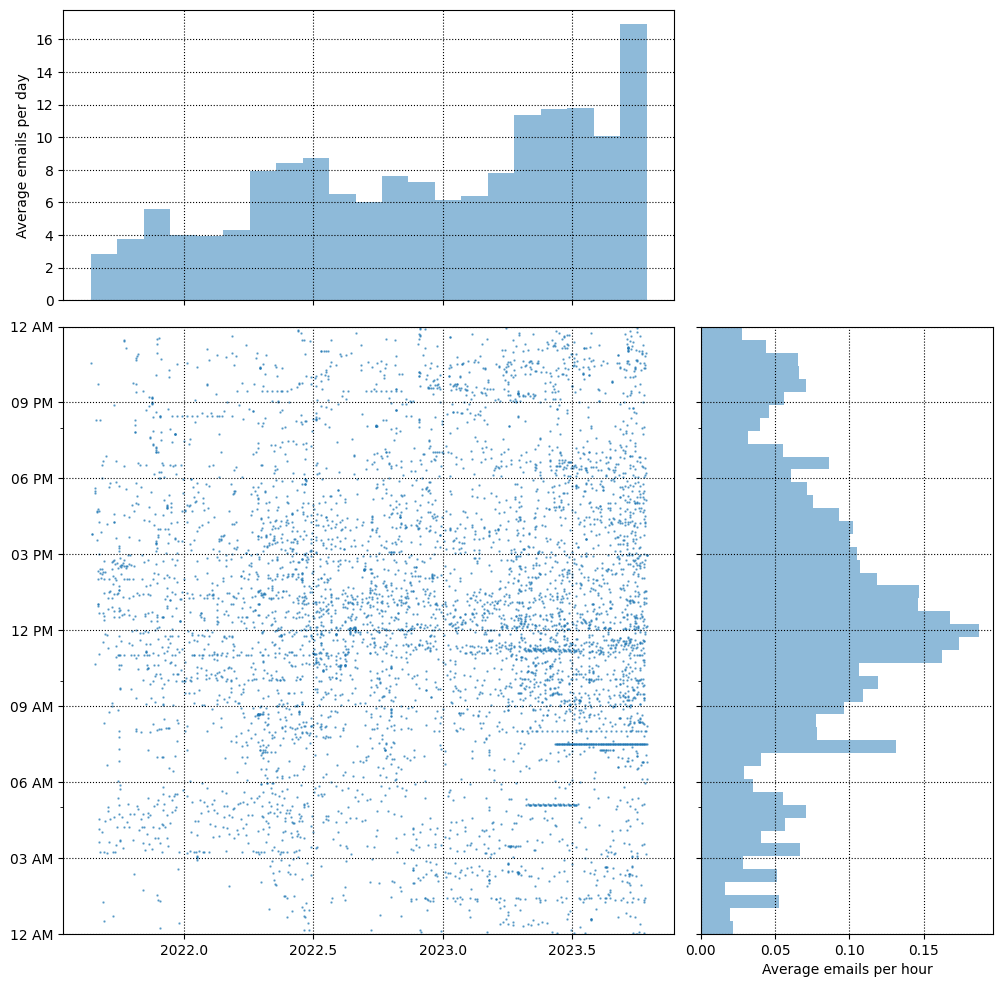

In [50]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

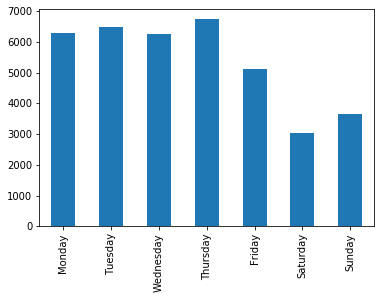

In [148]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [0]:
addrs = received['from'].value_counts()

addrs[0:4]

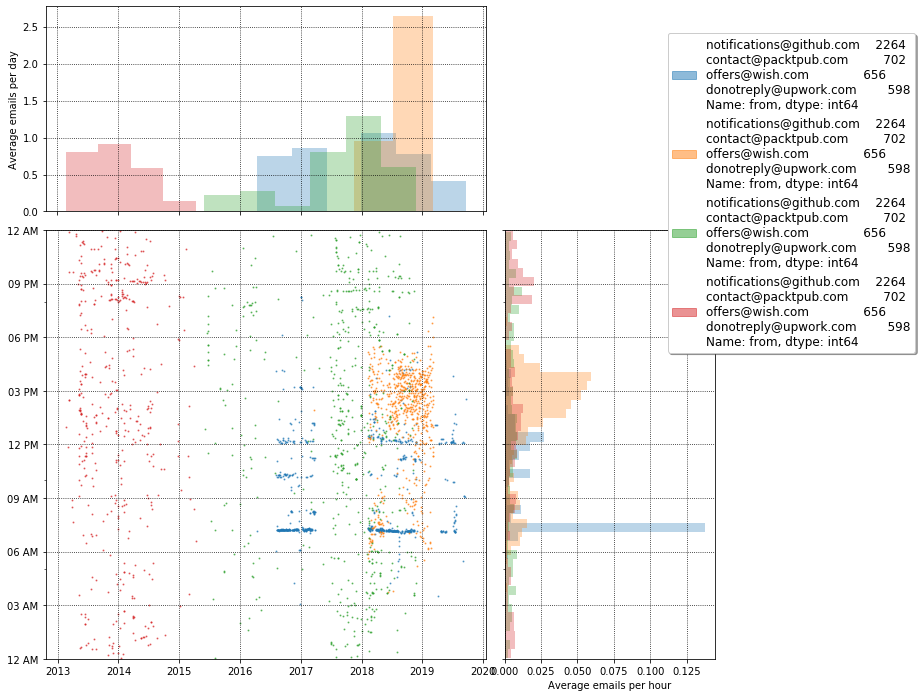

In [149]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

In [0]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

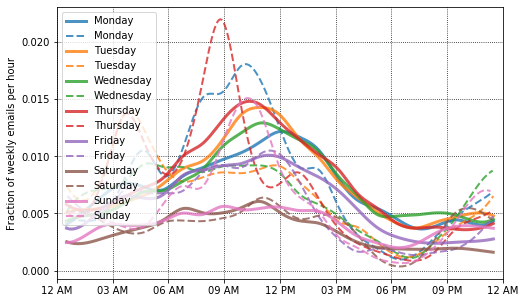

In [150]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')


In [0]:
from wordcloud import WordCloud 

df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

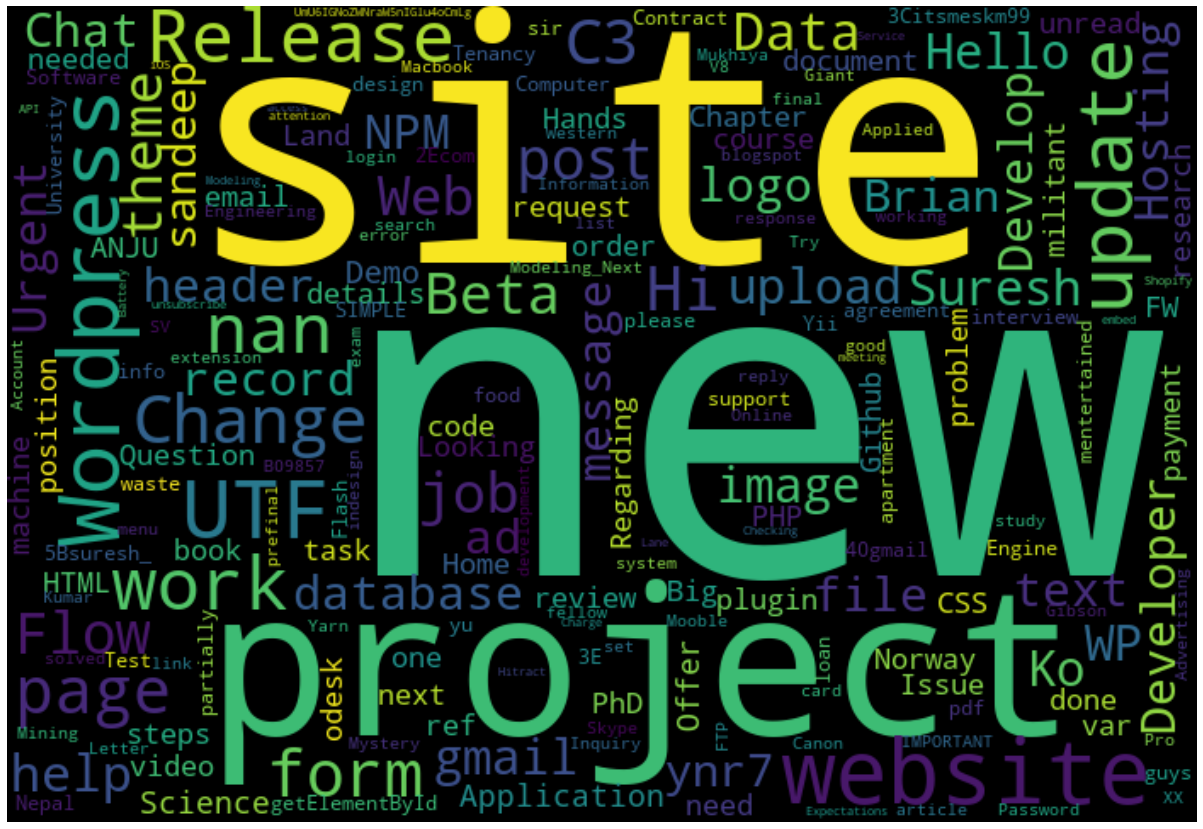

In [153]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)